In [ ]:
#trying out the whole song segment mfccs, instead of splitting it into 3s segements so that we can combine models

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import math
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import random
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sn

In [4]:
dataset_path = 'drive/MyDrive/Data/genres_original'

In [27]:

def save_mfccs(data_path, hop_length=512, sample_rate=22050, track_duration=30):
  data = {'mapping': [], 'labels': [], 'mfcc': []}

  samples_per_track = sample_rate*track_duration
  num_mfcc_vectors_per_track = math.ceil(samples_per_track / hop_length) +1
  #print(num_mfcc_vectors_per_track)

  for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not data_path:
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)

            for f in filenames:
              file_path = os.path.join(dirpath, f)
              signal, sample_rate = librosa.load(file_path, sr = sample_rate)

              mfcc = librosa.feature.mfcc(y=signal, sr = sample_rate, n_mfcc = 13, n_fft = 2048, hop_length = hop_length)
              mfcc = mfcc.T
              #print(len(mfcc))
              if len(mfcc) == num_mfcc_vectors_per_track:
                #this will discard wrong mfcc lengths
                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(i-1) 

  X = np.array(data["mfcc"])
  Y = np.array(data["labels"])
  z = data["mapping"]
  return X, Y, z

In [28]:
X, y, label_map = save_mfccs(dataset_path)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [32]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=25)

Epoch 1/25
24/24 [==============================] - 2s 70ms/step - loss: 34.0763 - accuracy: 0.2119 - val_loss: 13.3220 - val_accuracy: 0.3069
Epoch 2/25
24/24 [==============================] - 2s 66ms/step - loss: 8.7387 - accuracy: 0.3987 - val_loss: 8.2023 - val_accuracy: 0.4127
Epoch 3/25
24/24 [==============================] - 1s 62ms/step - loss: 4.6182 - accuracy: 0.4901 - val_loss: 5.1840 - val_accuracy: 0.4127
Epoch 4/25
24/24 [==============================] - 1s 61ms/step - loss: 4.3366 - accuracy: 0.5417 - val_loss: 6.0858 - val_accuracy: 0.4233
Epoch 5/25
24/24 [==============================] - 1s 62ms/step - loss: 2.7341 - accuracy: 0.6371 - val_loss: 5.7612 - val_accuracy: 0.4392
Epoch 6/25
24/24 [==============================] - 2s 65ms/step - loss: 2.5904 - accuracy: 0.6609 - val_loss: 4.3733 - val_accuracy: 0.5079
Epoch 7/25
24/24 [==============================] - 1s 61ms/step - loss: 0.6700 - accuracy: 0.8371 - val_loss: 5.0274 - val_accuracy: 0.4974
Epoch 8/25


In [34]:
def plot_history(history):

  plt.figure(figsize=(6,3))
  #create accuracy sublpot
  plt.plot(history.history["accuracy"], label="train accuracy")
  plt.plot(history.history["val_accuracy"], label="test accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  #axs[0].legend(loc="lower right")
  plt.title('Accuracy Comparison')
  plt.legend()
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(6,3))
  #create error sublpot
  plt.plot(history.history["loss"], label="train error")
  plt.plot(history.history["val_loss"], label="test error")
  plt.ylabel('Error')
  plt.xlabel('Epoch')
  #axs[1]wlegend(loc="upper right")
  plt.title('Error Comparison')
  plt.legend()
  plt.tight_layout()
  plt.show()

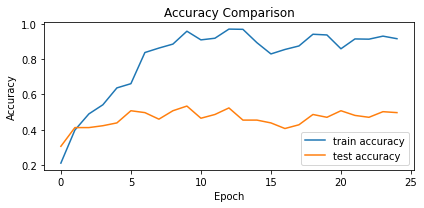

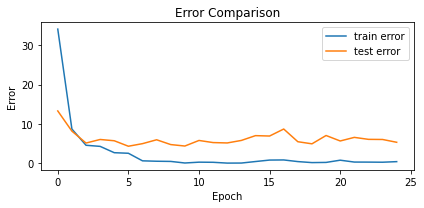

In [35]:
plot_history(history)

In [ ]:
#CNN

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [45]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [46]:
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [47]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
19/19 [==============================] - 12s 578ms/step - loss: 2.6966 - accuracy: 0.2086 - val_loss: 4.1452 - val_accuracy: 0.0927
Epoch 2/50
19/19 [==============================] - 11s 565ms/step - loss: 1.8839 - accuracy: 0.4106 - val_loss: 3.5391 - val_accuracy: 0.0795
Epoch 3/50
19/19 [==============================] - 11s 566ms/step - loss: 1.4447 - accuracy: 0.4934 - val_loss: 2.9428 - val_accuracy: 0.1192
Epoch 4/50
19/19 [==============================] - 11s 595ms/step - loss: 1.2364 - accuracy: 0.5679 - val_loss: 2.6274 - val_accuracy: 0.1523
Epoch 5/50
19/19 [==============================] - 11s 570ms/step - loss: 0.9580 - accuracy: 0.6904 - val_loss: 2.3864 - val_accuracy: 0.2119
Epoch 6/50
19/19 [==============================] - 11s 566ms/step - loss: 0.8319 - accuracy: 0.7285 - val_loss: 2.2107 - val_accuracy: 0.2517
Epoch 7/50
19/19 [==============================] - 11s 558ms/step - loss: 0.6899 - accuracy: 0.7964 - val_loss: 1.9776 - val_accuracy: 0.3046

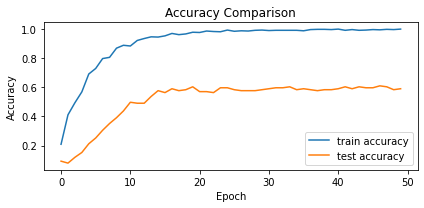

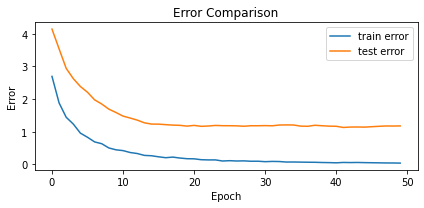

In [49]:
plot_history(history)

In [50]:
label_map

['jazz',
 'metal',
 'disco',
 'reggae',
 'classical',
 'country',
 'rock',
 'hiphop',
 'blues',
 'pop']

In [51]:
labels_dict = {
    0: 'jazz',
    1: 'metal',
    2: 'disco',
    3: 'reggae',
    4: 'classical',
    5: 'country',
    6: 'rock',
    7: 'hiphop',
    8: 'blues',
    9: 'pop'
}

In [53]:
for n in range(10):

  i = random.randint(0,len(X_test))
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 3
Predicted Genre: 3

Real Genre: 0
Predicted Genre: 0

Real Genre: 2
Predicted Genre: 2

Real Genre: 2
Predicted Genre: 2

Real Genre: 1
Predicted Genre: 1

Real Genre: 9
Predicted Genre: 9

Real Genre: 2
Predicted Genre: 1

Real Genre: 7
Predicted Genre: 9

Real Genre: 2
Predicted Genre: 3

Real Genre: 2
Predicted Genre: 1


In [83]:
predictions = model_cnn.predict(X_test, verbose=1)

6/6 [==============================] - 1s 177ms/step


In [85]:
y_true = []
y_predict = []
for i in range(len(predictions)):
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]
  X_to_predict = X_to_predict[np.newaxis, ...]
  prediction = model_cnn.predict(X_to_predict)
  predicted_index = np.argmax(prediction, axis=1)
  y_true.append(y_to_predict)
  y_predict.append(int(predicted_index))

In [86]:
cf_matrix = confusion_matrix(y_true, y_predict)
cf_matrix

array([[14,  1,  1,  0,  2,  1,  1,  0,  0,  0],
       [ 0, 23,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  4,  5,  4,  0,  0,  0,  3,  1,  6],
       [ 0,  0,  1, 13,  0,  2,  0,  2,  2,  2],
       [ 2,  0,  0,  0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  5,  3,  0,  1,  1],
       [ 0,  3,  3,  1,  0,  2,  5,  0,  5,  2],
       [ 0,  3,  2,  3,  0,  0,  1,  8,  0,  1],
       [ 2,  6,  2,  0,  0,  1,  0,  0,  8,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  2,  0, 15]])

In [87]:
confusion_df = pd.DataFrame(cf_matrix)
confusion_df

,0,1,2,3,4,5,6,7,8,9
0,14,1,1,0,2,1,1,0,0,0
1,0,23,0,0,0,0,0,0,0,0
2,1,4,5,4,0,0,0,3,1,6
3,0,0,1,13,0,2,0,2,2,2
4,2,0,0,0,10,0,0,0,0,0
5,0,0,1,1,0,5,3,0,1,1
6,0,3,3,1,0,2,5,0,5,2
7,0,3,2,3,0,0,1,8,0,1
8,2,6,2,0,0,1,0,0,8,0
9,0,0,1,0,0,0,0,2,0,15


In [88]:
confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
confusion_df

,jazz,metal,disco,reggae,classical,country,rock,hiphop,blues,pop
jazz,14,1,1,0,2,1,1,0,0,0
metal,0,23,0,0,0,0,0,0,0,0
disco,1,4,5,4,0,0,0,3,1,6
reggae,0,0,1,13,0,2,0,2,2,2
classical,2,0,0,0,10,0,0,0,0,0
country,0,0,1,1,0,5,3,0,1,1
rock,0,3,3,1,0,2,5,0,5,2
hiphop,0,3,2,3,0,0,1,8,0,1
blues,2,6,2,0,0,1,0,0,8,0
pop,0,0,1,0,0,0,0,2,0,15


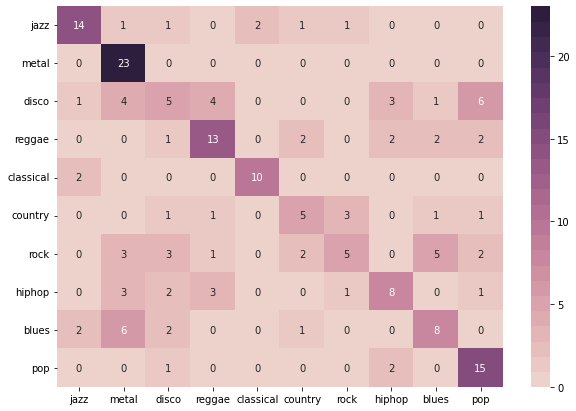

In [89]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion_df, annot=True, cmap=sn.cubehelix_palette(25))
#actual values are on the y axis and predicted values are on the x axis